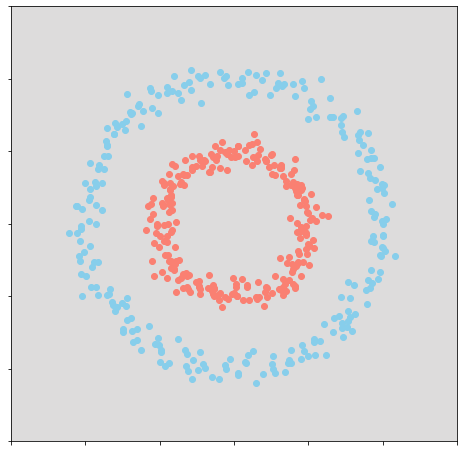

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Se crean los datos artificiales 
# Se busca clasificar en dos anillos concéntricos
# En el método make_circles, n_samples es el número total de números generados,
# factor es que tal separados estarán los circulos y noise es sobre probabilidad
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Entrada con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

In [ ]:
import tensorflow.compat.v1 as tf #Se importa la versión uno de tensorflow
tf.disable_v2_behavior() #Se deshabilitan las funcionalidades de la segunda versión

# Se definen los puntos de entrada de la red, para la matriz X e Y que están definidas arriba
# En inglés se traducen como «placeholders»
# Como primer parámetro se especifica el tipo de dato entre comillas
# Como segundo parámetro se especifican las dimensiones 
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

# Número de neuronas por capa, en la primera capa están las entradas
# En la segunda y tercera el número de neuronas puede varias
# En la última capa solo está la salida
nn = [2, 16, 8, 1]  

# Se definen aquellos parámetros que serán optimizados por la red (Pesos y bias)
# Estos valores van a ser inicializados de manera aleatoria
# También se especifican las dimensiones
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Pesos_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='Bias_1')

# Se realizan las operaciones de la primera capa
# Multiplicar los pesos por las variables, sumar el bias y 
# pasarlo por la función de activación relu
# Nota: el bias es un valor de sesgo
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Segunda capa
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Tercera capa
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Se pasa por la última función de activación que en este caso es la sigmoide
# Vector de predicciones de Y que consiste solo en la primera columna
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

# Evaluación de las predicciones. Con el error cuadrático medio
# Como primer parametro está la predicción y como segundo esta el placeholder
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error
# El optimizador aquí está basado en el «gradiente de descenso»
# La taza de aprendizaje es de 0.05
# Se hace en base a la función de costo «loss» que se especificó antes
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

# Session es donde está nuestro grafo computacional
# Desde las operaciones hasta los tensores están definidos
with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red
  # Dentro de estos también se encuentran los pesos y bias
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pasos de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      # Impresión de métricas.
      print('Paso: ', step, 'Coste = ', _loss)

Paso:  0 Coste =  0.45090726
Paso:  25 Coste =  0.3136445
Paso:  50 Coste =  0.27901834
Paso:  75 Coste =  0.25791848
Paso:  100 Coste =  0.24334231
Paso:  125 Coste =  0.23100172
Paso:  150 Coste =  0.2190357
Paso:  175 Coste =  0.20369601
Paso:  200 Coste =  0.18156138
Paso:  225 Coste =  0.15885687
Paso:  250 Coste =  0.1402718
Paso:  275 Coste =  0.12384435
Paso:  300 Coste =  0.10846188
Paso:  325 Coste =  0.09616656
Paso:  350 Coste =  0.08592719
Paso:  375 Coste =  0.077416696
Paso:  400 Coste =  0.070256576
Paso:  425 Coste =  0.064258546
Paso:  450 Coste =  0.058917817
Paso:  475 Coste =  0.05413208
Paso:  500 Coste =  0.049793016
Paso:  525 Coste =  0.045828365
Paso:  550 Coste =  0.04220016
Paso:  575 Coste =  0.038946174
Paso:  600 Coste =  0.036066703
Paso:  625 Coste =  0.033504862
Paso:  650 Coste =  0.03118407
Paso:  675 Coste =  0.029076837
Paso:  700 Coste =  0.027150458
Paso:  725 Coste =  0.025415905
Paso:  750 Coste =  0.023836622
Paso:  775 Coste =  0.022401521
Pa